# Exploratory Data Analysis, Insights, Recommendations

Some recommendations and insights are listed along with our exploratory data analysis and are not explicitly mentioned under Insights section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log
import seaborn as sns

% matplotlib inline

In [2]:
df = pd.read_excel('FinalVideoListCommentPrevInfo.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 48
Data columns (total 35 columns):
VideoID              3403 non-null object
Title                3403 non-null object
Description          3403 non-null object
Thumbnail            3403 non-null object
PublishedDate        3403 non-null datetime64[ns]
CategoryID           3403 non-null int64
ChannelID            3403 non-null object
ChannelTitle         3403 non-null object
CHViewCount          3403 non-null int64
CHSubscriberCount    3403 non-null int64
CHAge                3403 non-null int64
CHVideoCount         3403 non-null int64
PlaylistID           3403 non-null object
Tags                 3403 non-null object
Duration             3403 non-null int64
Caption              3403 non-null bool
ViewCount            3403 non-null int64
LikeCount            3403 non-null int64
DislikeCount         3403 non-null int64
FavouriteCount       3403 non-null int64
CommentCount         3403 non-null int64
Comm_count_p2     

In [49]:
df.head()

,VideoID,Title,Description,Thumbnail,PublishedDate,CategoryID,ChannelID,ChannelTitle,CHViewCount,CHSubscriberCount,...,PLikePerView,PPublishedDate,AgeVideo,date,weekday,LogLikePerView,ViewDiff,ViewsPercentChange,TimeDiff,Daysdiff
7,lo2RWY1ZQ3E,Jamie’s NEW Book | 1 Ingredients | QuickER & E...,It’s here! Jamie’s brand new concept in cookin...,https://i.ytimg.com/vi/lo2RWY1ZQ3E/default.jpg,2018-04-01,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,4.145152,2018-03-30,31,2018-04-01,Sunday,1.556474,33870,0.402051,2 days,2
8,4MrvQAqzVJE,Epic Chocolate Celebration Cake | Jamie Oliver,This is beautifully indulgent cake from my com...,https://i.ytimg.com/vi/4MrvQAqzVJE/default.jpg,2018-03-30,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,3.094744,2018-03-25,33,2018-03-30,Friday,1.421939,-90311,-0.517381,5 days,5
9,FmI98uLoRaM,Chocolate Hot Cross Buns | Jamie Oliver,What’s better than a Hot Cross Bun? A homemade...,https://i.ytimg.com/vi/FmI98uLoRaM/default.jpg,2018-03-25,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,3.217433,2018-03-23,38,2018-03-25,Sunday,1.129705,110217,1.713120,2 days,2
10,pFAWb_YACkI,Butterscotch Blondies | Claire Ptak | By Royal...,To celebrate the amazing news that the awesome...,https://i.ytimg.com/vi/pFAWb_YACkI/default.jpg,2018-03-23,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,2.575404,2018-03-18,40,2018-03-23,Friday,1.168584,-36851,-0.364184,5 days,5
11,LYJevi7iZOg,Family Minestrone Soup | Michela Chiappa,We've raided the archives for a cracking soup ...,https://i.ytimg.com/vi/LYJevi7iZOg/default.jpg,2018-03-18,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,3.871500,2018-03-11,45,2018-03-18,Sunday,0.946006,-120664,-0.543894,7 days,7


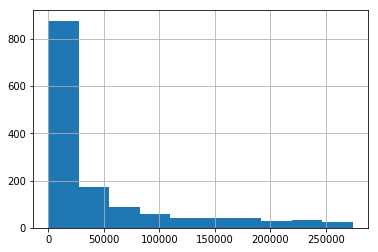

In [94]:
#Highly left skewed Y variable(ViewCount)
df['ViewCount'].hist(bins=10)

# Eliminating outliers(using IQR technique on ViewCount and VideoAge)


In [52]:
#Reference:http://colingorrie.github.io/outlier-detection.html
import numpy as np

def outliers_iqr(arr):
    quartile_1, quartile_3 = np.percentile(arr, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return [upper_bound,lower_bound]

In [53]:
lst=[]
arr=np.array(df['ViewCount'])
lst=outliers_iqr(arr)
lst

[143218.625, -82516.375]

View counts less than 276889.5

In [54]:
df = df[df['ViewCount']<276889.5]

In [55]:
df.shape

(1410, 43)

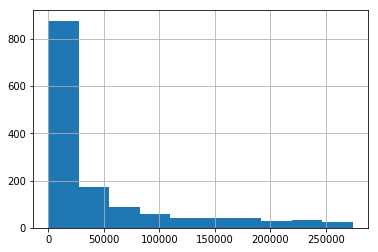

In [56]:
#ViewCount looks much better now after eliminating outliers
df['ViewCount'].hist(bins=10)

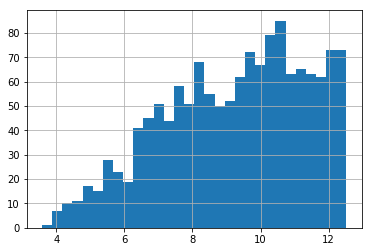

In [57]:
#Log transformation of ViewCount, it still does not show normal distribution
df['ViewCount'].apply(np.log).hist(bins=30)

# Feature Extraction
Extracted number of days since the Published date to get the Age of the video

In [58]:
#To find the relation between views and age of the video
from datetime import datetime
from dateutil.parser import parse

def convert_to_days(dt):
    d=parse(dt)
    a=d.strftime('%m/%d/%Y')
    x=datetime.strptime(a, '%m/%d/%Y').date()
    y=datetime.now().date()
    days=((y-x).days)
    return days


In [59]:
AgeVideo = []
for i in df['PublishedDate']:
    AgeVideo.append(convert_to_days(str(i)))
    
df['AgeVideo'] = AgeVideo

(array([576., 308., 229., 101.,  58.,  42.,  25.,  27.,  23.,  21.]),
 array([ 31. ,  88.3, 145.6, 202.9, 260.2, 317.5, 374.8, 432.1, 489.4,
        546.7, 604. ]),
 <a list of 10 Patch objects>)

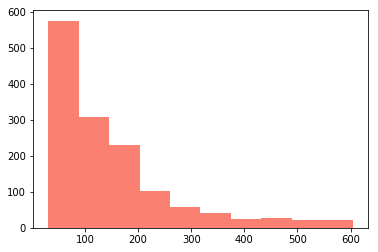

In [95]:
plt.hist(df['AgeVideo'], color = 'salmon')

In [61]:
#Outlier analysis for Age of the video
lst1=[]
arr1=np.array(df['AgeVideo'])
lst1=outliers_iqr(arr1)
lst1

[367.0, -121.0]

In [62]:
#age of the video less than 606 days and greater than 30 days
df = df[df['AgeVideo']<606]

In [63]:
df = df[df['AgeVideo']>30]

(array([117., 245., 282., 247., 182., 157.,  88.,  64.,  18.,  10.]),
 array([  15. ,  133.7,  252.4,  371.1,  489.8,  608.5,  727.2,  845.9,
         964.6, 1083.3, 1202. ]),
 <a list of 10 Patch objects>)

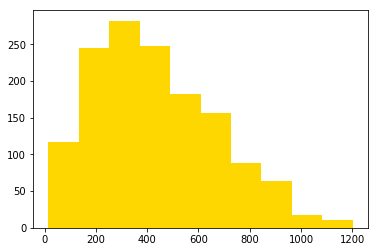

In [98]:
plt.hist(df['Duration'], color = 'gold')

In [65]:
#Outlier analysis for Age of the video
lst2=[]
arr2=np.array(df['Duration'])
lst2=outliers_iqr(arr2)
lst2

[1134.0, -282.0]

In [66]:
df = df[df['Duration']<1205]

(array([117., 245., 282., 247., 182., 157.,  88.,  64.,  18.,  10.]),
 array([  15. ,  133.7,  252.4,  371.1,  489.8,  608.5,  727.2,  845.9,
         964.6, 1083.3, 1202. ]),
 <a list of 10 Patch objects>)

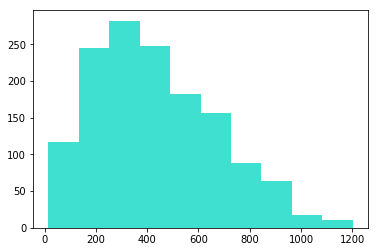

In [97]:
plt.hist(df['Duration'], color = 'turquoise')

In [68]:
df.shape

(1410, 43)

# Feature Extraction: To fetch weekday from published date

In [69]:
df['PublishedDate'] = pd.to_datetime(df['PublishedDate'], errors='coerce')

In [70]:
df['date'] = df["PublishedDate"].dt.date

In [71]:
import time
def date_to_weekday(date):
    date = str(date)
    weekday = time.strftime("%A", time.strptime(date, "%Y-%m-%d"))
    return weekday

In [72]:
df['weekday'] = df['date'].apply(date_to_weekday)

# Feature Extraction: Create new dependent variable LIKESPERVIEW to quantify LIKEABILITY

In [73]:
#Created Like/View
df = df[df['ViewCount'] > 0]
df['LikePerView']=df['LikeCount'] / df['ViewCount'].astype(np.float)*100

(array([918., 387.,  58.,  23.,  12.,   5.,   2.,   3.,   1.,   1.]),
 array([ 0.03770351,  3.75486339,  7.47202328, 11.18918316, 14.90634304,
        18.62350292, 22.3406628 , 26.05782268, 29.77498256, 33.49214244,
        37.20930233]),
 <a list of 10 Patch objects>)

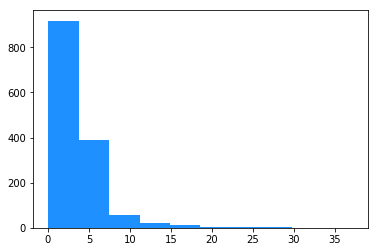

In [100]:
#it appears left skewed
plt.hist(df['LikePerView'],bins=10, color = 'dodgerblue')

(array([  3.,   1.,  17.,  96., 167., 304., 502., 251.,  57.,  12.]),
 array([-3.278002  , -2.58854592, -1.89908984, -1.20963376, -0.52017768,
         0.1692784 ,  0.85873448,  1.54819056,  2.23764663,  2.92710271,
         3.61655879]),
 <a list of 10 Patch objects>)

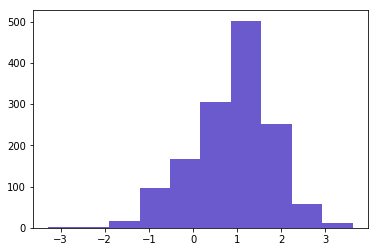

In [101]:
df=df[df['LikePerView']>0]
#Log transformation of ViewCount
df['LogLikePerView']=df['LikePerView'].apply(np.log)
plt.hist(df['LogLikePerView'], bins=10, color = 'slateblue')

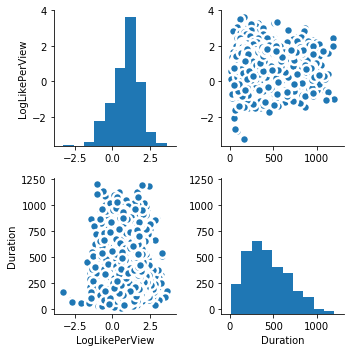

In [104]:
features = ['LogLikePerView','Duration']
data = df[features]
sns.pairplot(data, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

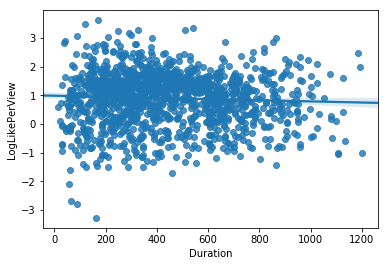

In [77]:
sns.regplot(df['Duration'],df['LogLikePerView'])

Create another dependent variable ViewDiff. This will help us predict the difference of view from the previous video and 
indirectly help predict VIEWS.
Reference: https://github.com/allenwang28/YouTube-Virality-Predictor/blob/master/notebooks/get_weekday.ipynb

In [78]:
df = df[df['PView'] > 0]
df['ViewDiff'] = df['ViewCount'] - df['PView']
df['ViewsPercentChange'] = df['ViewDiff'] / df['PView'].astype(np.float)
df.dropna()

,VideoID,Title,Description,Thumbnail,PublishedDate,CategoryID,ChannelID,ChannelTitle,CHViewCount,CHSubscriberCount,...,PLikePerView,PPublishedDate,AgeVideo,date,weekday,LogLikePerView,ViewDiff,ViewsPercentChange,TimeDiff,Daysdiff
7,lo2RWY1ZQ3E,Jamie’s NEW Book | 1 Ingredients | QuickER & E...,It’s here! Jamie’s brand new concept in cookin...,https://i.ytimg.com/vi/lo2RWY1ZQ3E/default.jpg,2018-04-01,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,4.145152,2018-03-30,31,2018-04-01,Sunday,1.556474,33870,0.402051,2 days,2
8,4MrvQAqzVJE,Epic Chocolate Celebration Cake | Jamie Oliver,This is beautifully indulgent cake from my com...,https://i.ytimg.com/vi/4MrvQAqzVJE/default.jpg,2018-03-30,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,3.094744,2018-03-25,33,2018-03-30,Friday,1.421939,-90311,-0.517381,5 days,5
9,FmI98uLoRaM,Chocolate Hot Cross Buns | Jamie Oliver,What’s better than a Hot Cross Bun? A homemade...,https://i.ytimg.com/vi/FmI98uLoRaM/default.jpg,2018-03-25,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,3.217433,2018-03-23,38,2018-03-25,Sunday,1.129705,110217,1.713120,2 days,2
10,pFAWb_YACkI,Butterscotch Blondies | Claire Ptak | By Royal...,To celebrate the amazing news that the awesome...,https://i.ytimg.com/vi/pFAWb_YACkI/default.jpg,2018-03-23,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,2.575404,2018-03-18,40,2018-03-23,Friday,1.168584,-36851,-0.364184,5 days,5
11,LYJevi7iZOg,Family Minestrone Soup | Michela Chiappa,We've raided the archives for a cracking soup ...,https://i.ytimg.com/vi/LYJevi7iZOg/default.jpg,2018-03-18,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,3.871500,2018-03-11,45,2018-03-18,Sunday,0.946006,-120664,-0.543894,7 days,7
12,Uruo4cyDIWU,5 Things… Quick and Easy,Want some tasty and delicious food without hav...,https://i.ytimg.com/vi/Uruo4cyDIWU/default.jpg,2018-03-11,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,3.343930,2018-03-04,52,2018-03-11,Sunday,1.353642,84708,0.617657,7 days,7
13,ZXoHZBXUhLk,Easy Ratatouille | Alex French Guy Cooking,Congrats on the 500k subs Alex. X French Guy C...,https://i.ytimg.com/vi/ZXoHZBXUhLk/default.jpg,2018-03-04,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,2.708606,2018-02-25,59,2018-03-04,Sunday,1.207147,-505696,-0.786659,7 days,7
15,3fYvNOr8izo,Jamie’s Gado Gado | Jamie Oliver,Based on a favourite Indonesian Street Food Ga...,https://i.ytimg.com/vi/3fYvNOr8izo/default.jpg,2018-02-18,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,1.780050,2018-02-16,73,2018-02-18,Sunday,1.061141,149514,1.612985,2 days,2
16,LADyii3YMkA,Friday Night Feast | Four Awesome Weekend Dish...,Down on the set of Jamie and Jimmy’s Friday Ni...,https://i.ytimg.com/vi/LADyii3YMkA/default.jpg,2018-02-16,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,2.313173,2018-02-11,75,2018-02-16,Friday,0.576642,-28006,-0.232030,5 days,5
17,BEYSq5x1RNI,Smoky Pancetta Cod | Jamie Oliver | #Quickand...,This succulent and smoky dish is unbelievably ...,https://i.ytimg.com/vi/BEYSq5x1RNI/default.jpg,2018-02-11,24,UCpSgg_ECBj25s9moCDfSTsA,Jamie Oliver,435177777,3681515,...,2.127750,2018-02-06,80,2018-02-11,Sunday,0.838620,73890,1.578509,5 days,5


In [79]:
#creating TimeDiff feature to check it it affects ViewDiff variable
df['TimeDiff'] = pd.to_timedelta(df['PublishedDate']) - pd.to_timedelta(df['PPublishedDate'])
# Drop some that have negative time diff values
df = df[df['TimeDiff'] > pd.Timedelta(0)]
df['Daysdiff'] = (df['TimeDiff'] / np.timedelta64(24, 'h')).astype(np.int)

# Correlation Matrix

In [80]:
df[['CHSubscriberCount', 'CHVideoCount', 'CHViewCount','CHAge','PComments', 'PLike','PView','PLikePerView','Duration',
   'Comm_count_p2','Comm_count_p7','AgeVideo','ViewsPercentChange','LikePerView','Daysdiff','LogLikePerView']].corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,CHSubscriberCount,CHVideoCount,CHViewCount,CHAge,PComments,PLike,PView,PLikePerView,Duration,Comm_count_p2,Comm_count_p7,AgeVideo,ViewsPercentChange,LikePerView,Daysdiff,LogLikePerView
CHSubscriberCount,1.0,0.38,0.98,0.36,0.27,0.39,0.24,-0.054,-0.059,-0.16,-0.061,-0.15,-0.052,-0.051,-0.059,0.079
CHVideoCount,0.38,1.0,0.36,0.4,0.097,0.17,0.021,0.058,-0.024,0.11,0.15,-0.044,-0.071,0.066,-0.033,0.26
CHViewCount,0.98,0.36,1.0,0.45,0.28,0.4,0.25,-0.082,-0.02,-0.18,-0.097,-0.17,-0.053,-0.079,-0.065,0.034
CHAge,0.36,0.4,0.45,1.0,0.05,0.11,0.033,-0.05,-0.077,0.016,0.037,-0.22,-0.041,-0.053,-0.083,-0.0073
PComments,0.27,0.097,0.28,0.05,1.0,0.83,0.64,-0.02,0.022,-0.12,-0.088,-0.045,-0.049,-0.018,-0.022,0.058
PLike,0.39,0.17,0.4,0.11,0.83,1.0,0.78,-0.042,0.042,-0.2,-0.15,-0.033,-0.069,-0.043,-0.026,0.066
PView,0.24,0.021,0.25,0.033,0.64,0.78,1.0,-0.16,0.053,-0.16,-0.14,-0.044,-0.069,-0.12,-0.019,-0.085
PLikePerView,-0.054,0.058,-0.082,-0.05,-0.02,-0.042,-0.16,1.0,-0.064,0.41,0.46,-0.068,-0.028,0.72,-0.051,0.65
Duration,-0.059,-0.024,-0.02,-0.077,0.022,0.042,0.053,-0.064,1.0,-0.12,-0.099,-0.11,0.061,-0.081,-0.066,-0.052
Comm_count_p2,-0.16,0.11,-0.18,0.016,-0.12,-0.2,-0.16,0.41,-0.12,1.0,0.93,-0.003,-0.071,0.44,-0.059,0.37


# Correlation Analysis

From the correlation matrix it can be seen that CHANNEL RELATED ATTRIBUTES are highly correlated.

Also PLikePerView(Likeability of previous video) is highly correlated with LikePerView of current video

Comm_count_p7(count of comments have positive sentiment after 7 days is correlated to LikePerView as compared to
             count of comments have positive sentiment after 2 days)

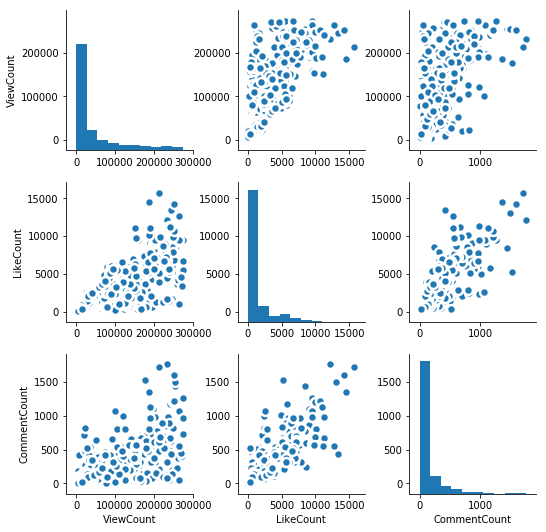

In [81]:
features = ['ViewCount','LikeCount','CommentCount']
data = df[features]
sns.pairplot(data, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

Analysis: It can be seen that LikeCount and CommentCount have more constant slope as compared to ViewCount

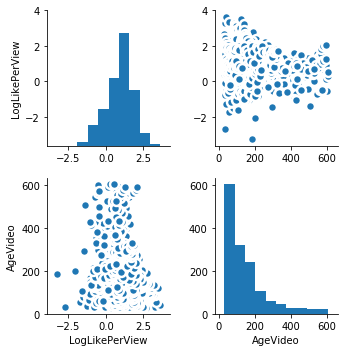

In [82]:
#AgeVideo versus LogLikePerView
features = ['LogLikePerView','AgeVideo']
data = df[features]
sns.pairplot(data, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

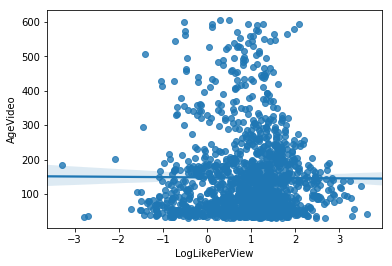

In [83]:
sns.regplot(df['LogLikePerView'],df['AgeVideo'])

# Insights

# 1. Most popular category when we search for "FOOD" on YouTube

NOTE: Our code fetches the entered number of pages for a given search word according to the YouTube search functionality or YouTube relevant search.
Hence the following results would be very insightful to find which categories the given search word(in our case it is 'FOOD') occurs frequently

In [84]:
df.groupby(['CategoryID'])['VideoID'].count()

CategoryID
1      38
2       8
10     14
17     37
19    220
22    398
23     30
24    212
25      6
26    424
27     19
28      1
29      3
Name: VideoID, dtype: int64

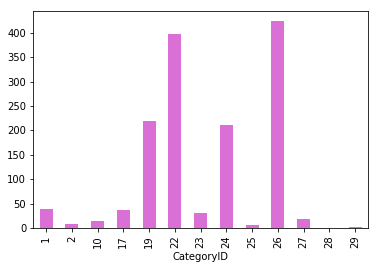

In [107]:
df.groupby('CategoryID').VideoID.count().plot(kind="bar", color = 'orchid')

1	Film & Animation

2	Autos & Vehicles

10	Music

17	Sports

19	Travel & Events

22	People & Blogs

23	Comedy

24	Entertainment

25	News & Politics

26	Howto & Style

27	Education

28	Science & Technology

29	Nonprofits & Activism

These categories are fetched from the YouTubes Developers link: https://developers.google.com/youtube/v3/docs/videoCategories/list

# 2. The most popular channels

In [87]:
dfnew1 = df[df['ViewCount']<100000]

In [88]:
dfnew1 = dfnew1[dfnew1['ViewCount']>50000]

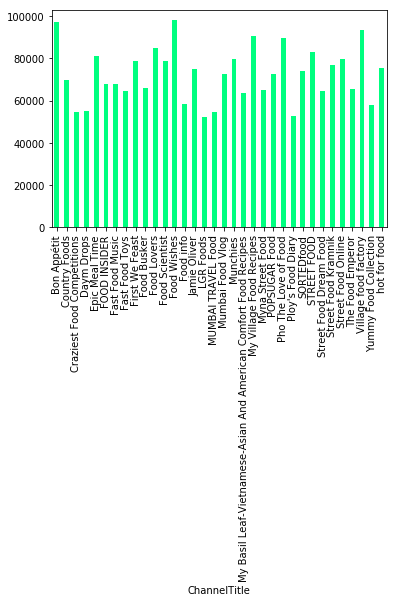

In [113]:
dfnew1.groupby('ChannelTitle').ViewCount.mean().plot(kind="bar", color = 'springgreen')

# 3. The probability of views increases if the video is uploaded on either Saturday/Wednesday

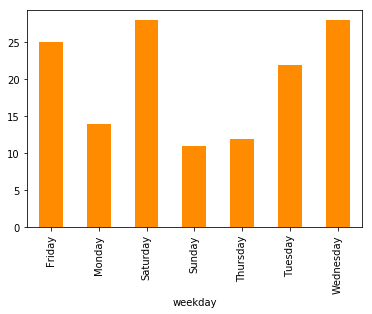

In [112]:
dfnew1.groupby('weekday').ViewCount.count().plot(kind="bar", color = 'darkorange')

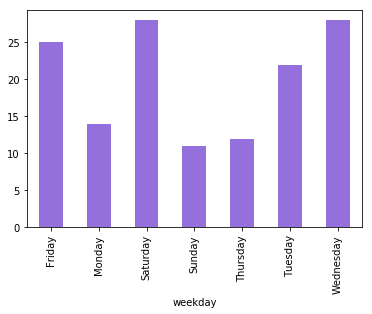

In [117]:
dfnew1.groupby('weekday').LikePerView.count().plot(kind="bar", color = 'mediumpurple')

It can be observed from the above graph that videos published on SATURDAY and WEDNESDAY tend to get more LIKEABILITY and VIEWS 

# EDA FOR TAGS AND DESCRIPTION

# 4. Insights about the most frequently occuring words in 'Tags'

In [60]:
#Reference: https://www.kaggle.com/adiljadoon/word-cloud-with-python
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

In [62]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['Tags']))

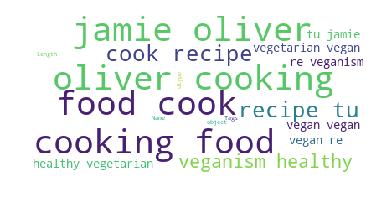

In [63]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

# Recommendation1:

Jamie Oliver is a popular celebrity chef.

Vegan/Vegetarian recipie occurs more frequently in the Tags.

food/cook/cooking occurs frequently as well.

From the above frequently occuring words, we can recommend to use above words in the Tags

In [64]:
wordcloud1 = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['Description']))

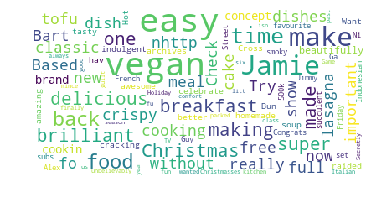

In [65]:
print(wordcloud1)
fig = plt.figure(1)
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()
fig.savefig("word11.png", dpi=900)

# Recommendation2:

Easy/Vegan/Try/making/delicious/crispy/show/cooking/time are few words that should be used frequently in the description